# **1. Introduction**
This project applies data analytics and machine learning techniques to optimize inventory management for a retail company. Using the Online Retail dataset from the UCI Machine Learning Repository, we aim to improve inventory control, reduce costs, and enhance customer satisfaction through data-driven decision-making.



# **2. Objectives**

The main objectives of this project are:

a) Predict future demand for products

b) Identify slow-moving and fast-moving items

c) Determine optimal reorder points and quantities

d) Minimize stockouts and overstock situations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **3. Data Collection and Preprocessing**

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

## **3.1 Dataset Description**

The Online Retail dataset contains transactional data from a UK-based online retailer, including:

InvoiceNo: Invoice number

StockCode: Product code

Description: Product name

Quantity: Quantities of each product per transaction

InvoiceDate: Date of the transaction

UnitPrice: Product price per unit

CustomerID: Customer number

Country: Country where the customer resides


In [4]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [8]:
len(df)

541909

In [6]:
len(df.StockCode.unique())

4070

In [9]:
len(df.CustomerID.unique())

4373

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

## **4.1 Data Cleaning**

Removed rows with missing values

Eliminated negative quantities and prices

Converted InvoiceDate to datetime format

Created a TotalPrice column (Quantity * UnitPrice)

Removed outliers using the Interquartile Range (IQR) method

In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
# Remove rows with negative quantities or prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Remove outliers (items with extremely high quantities or prices)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Quantity'] >= Q1 - 1.5*IQR) & (df['Quantity'] <= Q3 + 1.5*IQR)]

In [ ]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  372237.000000                         372237  372237.000000   
mean        7.029981  2011-07-11 07:21:48.653680384       3.228548   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:30:00       1.250000   
50%         4.000000            2011-08-01 10:08:00       1.950000   
75%        12.000000            2011-10-21 12:05:00       3.750000   
max        27.000000            2011-12-09 12:50:00    8142.750000   
std         6.661562                            NaN      22.814240   

          CustomerID     TotalPrice                           Date  
count  372237.000000  372237.000000                         372237  
mean    15309.568880      14.370477  2011-07-10 18:05:38.242571264  
min     12347.000000       0.001000            2010-12-01 00:00:00  
25%     13985.000000       4.200000            2011-04-07 00:00:00  
50%     15194.000000    

## **4.2 Top Selling Products**

Identified and visualized the top 10 selling products to prioritize inventory management for high-demand items.

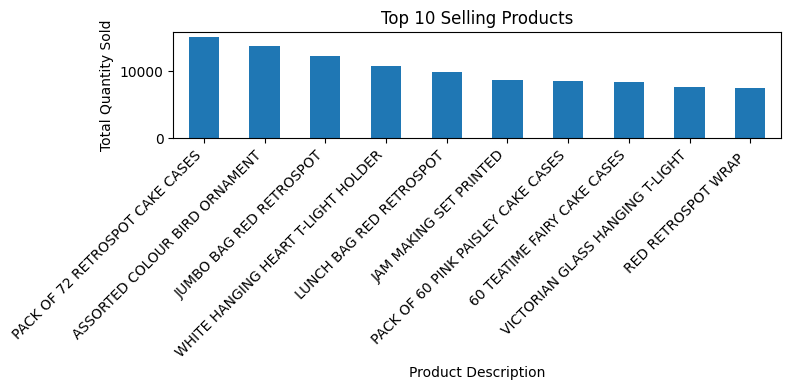

In [ ]:
# Top 10 selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 4))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **4.3 Sales Trend Analysis**

Analyzed monthly sales trends to identify seasonality, crucial for demand forecasting and inventory planning.

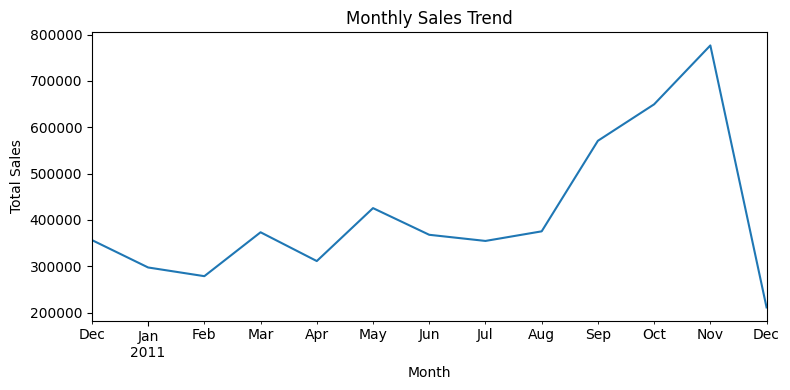

In [ ]:
# Sales trend over time
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(8, 4))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## **4.4 Price-Quantity Relationship**

Examined the relationship between unit price and quantity sold using hexbin plots and box plots, revealing insights for pricing strategies.

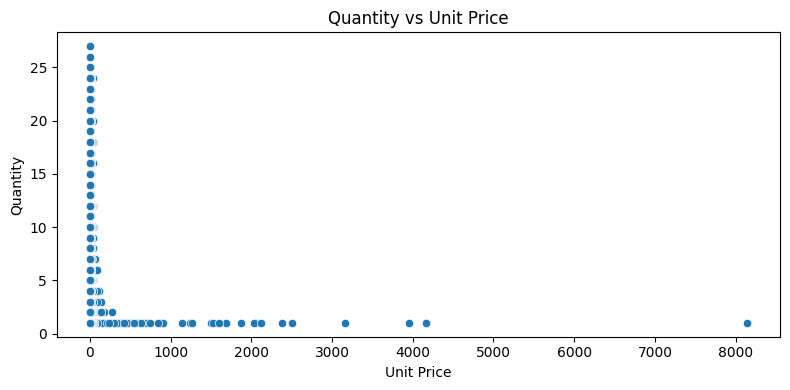

In [ ]:
# Correlation between Quantity and UnitPrice
plt.figure(figsize=(8, 4))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Quantity vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

# **5. Demand Forecasting using Machine Learning**

## **5.1 Data Preparation**

Aggregated daily quantities for each product

Created features from date information

In [ ]:
# Prepare the data for modeling
df['Date'] = df['InvoiceDate'].dt.date
product_daily_qty = df.groupby(['Date', 'StockCode'])['Quantity'].sum().unstack()

In [ ]:
# Fill missing values with 0 (no sales on that day)
product_daily_qty = product_daily_qty.fillna(0)

## **5.2 Model Selection and Training**

Chose Random Forest Regressor for its ability to capture non-linear
relationships and handle multiple features

Split data into training and testing sets

Scaled features using StandardScaler

In [ ]:
# Create features and target
X = (product_daily_qty.index.astype('datetime64[ns]').astype(int) // 10**9).values.reshape(-1, 1)  # Convert date to Unix timestamp and reshape to 2D array
y = product_daily_qty.values

In [ ]:
# Reshape X to be 2D
X = X.reshape(-1, 1)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

## **5.3 Model Evaluation**

Evaluated the model using Mean Squared Error and R-squared score


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 49.58829196285292
R-squared Score: -1.4058237071647486


# **6. Inventory Management Concepts and Implementation**

## **6.1 Identifying Slow-moving and Fast-moving Items (ABC Analysis)**
ABC analysis is a inventory categorization method which divides items into three categories (A, B, and C) based on their importance.

**Implementation:**

Calculate average daily sales for each product and defined thresholds for slow-moving (bottom 25%) and fast-moving (top 25%) items. Categorize items based on these thresholds

**Inventory Strategy:**

Fast-moving items (A category): Require frequent reordering and close monitoring

Slow-moving items (C category): May need minimal stock or consideration for discontinuation

Medium-moving items (B category): Moderate monitoring and standard reordering processes

In [ ]:
# Calculate average daily sales for each product
product_daily_avg = df.groupby('StockCode')['Quantity'].sum() / len(df['Date'].unique())

In [ ]:
# Define thresholds for slow-moving and fast-moving items
slow_threshold = product_daily_avg.quantile(0.25)
fast_threshold = product_daily_avg.quantile(0.75)

In [ ]:
# Categorize items
slow_moving = product_daily_avg[product_daily_avg <= slow_threshold] # Removed .index
fast_moving = product_daily_avg[product_daily_avg >= fast_threshold] # Removed .index

In [ ]:

print(f"Number of slow-moving items: {len(slow_moving)}")
print(f"Number of fast-moving items: {len(fast_moving)}")

Number of slow-moving items: 916
Number of fast-moving items: 913


In [ ]:
# Convert slow_moving to a DataFrame before sampling
print(df[df['StockCode'].isin(slow_moving.sample(5).index)]['Description'].unique())


['CARNIVAL BRACELET' 'SOFT PINK ROSE TOWEL '
 'PINK FLUFFY CHRISTMAS DECORATION' 'RUSTIC WOODEN CABINET, GLASS DOORS'
 'CRYSTAL SEA HORSE PHONE CHARM']


In [ ]:
print("\nSample fast-moving items:")
# Convert fast_moving to a DataFrame before sampling
print(df[df['StockCode'].isin(fast_moving.sample(5).index)]['Description'].unique())


Sample fast-moving items:
['CHARLOTTE BAG DOLLY GIRL DESIGN' 'LUNCH BOX WITH CUTLERY RETROSPOT '
 'SET/10 BLUE POLKADOT PARTY CANDLES' 'WRAP BIRD GARDEN '
 'LUNCH BAG PAISLEY PARK  ']


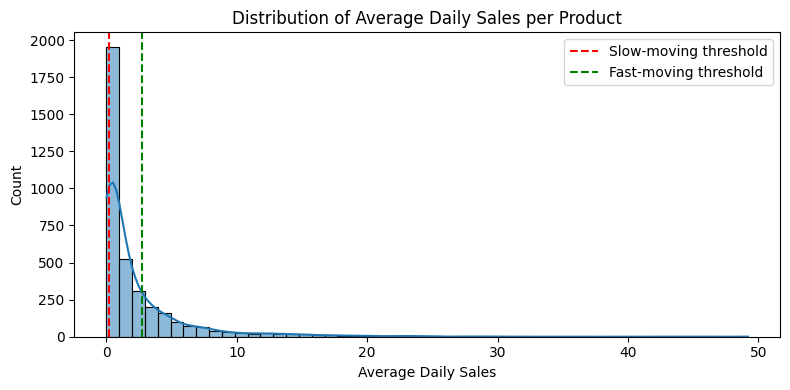

In [ ]:
# Visualize slow-moving vs fast-moving items
plt.figure(figsize=(8, 4))
sns.histplot(product_daily_avg, bins=50, kde=True)
plt.axvline(slow_threshold, color='r', linestyle='--', label='Slow-moving threshold')
plt.axvline(fast_threshold, color='g', linestyle='--', label='Fast-moving threshold')
plt.title('Distribution of Average Daily Sales per Product')
plt.xlabel('Average Daily Sales')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


## **6.2 Reorder Point (ROP)**

The reorder point is the inventory level at which a new order should be placed to avoid stockouts.

ROP Formula: (Average Daily Demand * Lead Time) + Safety Stock

**Implementation:**

Calculate reorder points considering lead time and desired service level.
Incorporate safety stock to account for demand variability

In [ ]:
def calculate_reorder_point(demand, lead_time, service_level=0.95):
    z_score = 1.645  # for 95% service level
    demand_daily = demand / 365
    reorder_point = (demand_daily * lead_time) + (z_score * np.sqrt(lead_time * demand_daily * abs((1 - demand_daily))))
    return np.ceil(reorder_point)


## **6.3 Economic Order Quantity (EOQ)**

EOQ is the optimal order quantity that minimizes total inventory holding costs and ordering costs.

EOQ Formula: √((2 * D * S) / H)

Where:

D = Annual demand

S = Fixed cost per order

H = Annual holding cost per unit

**Implementation:**

Calculate EOQ for each product using annual demand, assumed order cost, and holding cost rate

In [ ]:
def calculate_economic_order_quantity(demand, order_cost, holding_cost):
    return np.sqrt((2 * demand * order_cost) / holding_cost)

In [ ]:
# Assume a lead time of 7 days, order cost of $50, and annual holding cost of 20% of unit price
lead_time = 7
order_cost = 50
holding_cost_rate = 0.2

In [ ]:
# Calculate reorder points and EOQ for each product
inventory_params = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).rename(columns={'Quantity': 'AnnualDemand'})

In [ ]:
inventory_params['ReorderPoint'] = inventory_params.apply(lambda row: calculate_reorder_point(row['AnnualDemand'], lead_time), axis=1)
inventory_params['EOQ'] = inventory_params.apply(lambda row: calculate_economic_order_quantity(row['AnnualDemand'], order_cost, row['UnitPrice'] * holding_cost_rate), axis=1)


In [ ]:
print(inventory_params.head())

           AnnualDemand  UnitPrice  ReorderPoint          EOQ
StockCode                                                    
10002               377   0.850000           9.0   470.919001
10080               243   0.413000           7.0   542.391797
10120               133   0.210000           5.0   562.731434
10125               636   0.788571          18.0   635.028243
10133              1405   0.539444          42.0  1141.168570


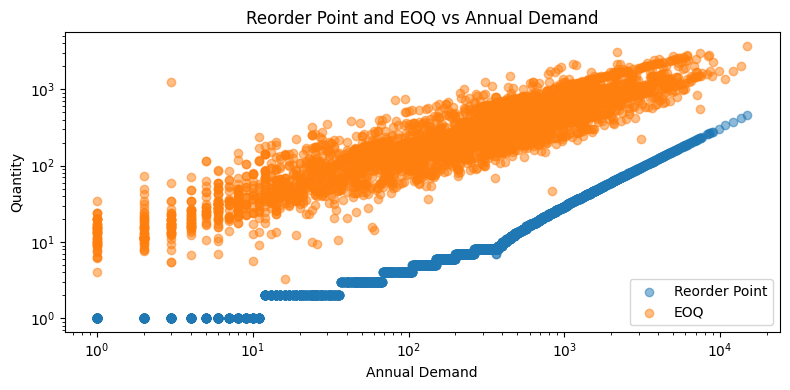

In [ ]:
# Visualize reorder points and EOQ
plt.figure(figsize=(8, 4))
plt.scatter(inventory_params['AnnualDemand'], inventory_params['ReorderPoint'], alpha=0.5, label='Reorder Point')
plt.scatter(inventory_params['AnnualDemand'], inventory_params['EOQ'], alpha=0.5, label='EOQ')
plt.xscale('log')
plt.yscale('log')
plt.title('Reorder Point and EOQ vs Annual Demand')
plt.xlabel('Annual Demand')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

## **6.4 Inventory Simulation**
Simulate inventory levels over time to estimate potential stockouts and overstock situations.

**Implementation:**

Create a function to simulate daily inventory changes over a year. Recorde stockouts and overstock days for each product

In [ ]:
def simulate_inventory(initial_stock, daily_demand, reorder_point, order_quantity, days):
    stock = initial_stock
    stockouts = 0
    overstock_days = 0
    for _ in range(days):
        if stock <= reorder_point:
            stock += order_quantity
        stock -= daily_demand
        if stock < 0:
            stockouts += 1
            stock = 0
        elif stock > order_quantity:
            overstock_days += 1
    return stockouts, overstock_days

In [ ]:
# Simulate for a sample of products
sample_products = inventory_params.sample(10)

In [ ]:
for idx, row in sample_products.iterrows():
    daily_demand = row['AnnualDemand'] / 365
    initial_stock = row['ReorderPoint'] + row['EOQ']
    stockouts, overstock_days = simulate_inventory(initial_stock, daily_demand, row['ReorderPoint'], row['EOQ'], 365)
    print(f"Product {idx}: Stockouts: {stockouts}, Overstock days: {overstock_days}")

Product 21189: Stockouts: 0, Overstock days: 13
Product 22048: Stockouts: 0, Overstock days: 10
Product 90201A: Stockouts: 0, Overstock days: 23
Product 90010E: Stockouts: 0, Overstock days: 36
Product 22783: Stockouts: 0, Overstock days: 31
Product 23336: Stockouts: 0, Overstock days: 12
Product 22891: Stockouts: 0, Overstock days: 16
Product 21896: Stockouts: 0, Overstock days: 16
Product 21417: Stockouts: 0, Overstock days: 12
Product 16151A: Stockouts: 0, Overstock days: 60


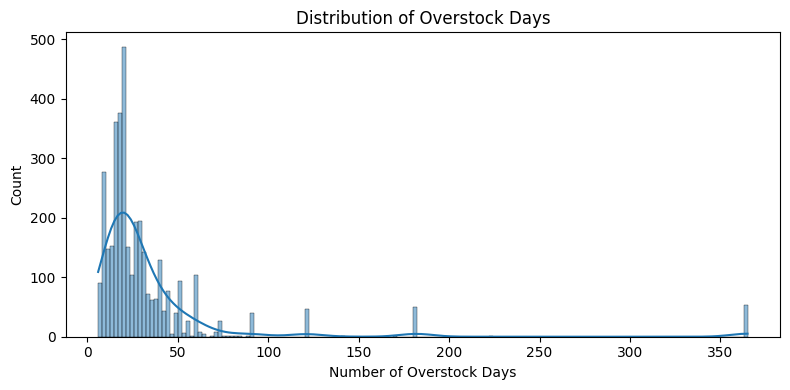

In [ ]:
# Visualize stockouts and overstock days from simulation
simulation_results = pd.DataFrame(
    [simulate_inventory(row['ReorderPoint'] + row['EOQ'], row['AnnualDemand']/365, row['ReorderPoint'], row['EOQ'], 365)
     for _, row in inventory_params.iterrows()],
    columns=['Stockouts', 'OverstockDays']
)

plt.figure(figsize=(8, 4))
sns.histplot(simulation_results['OverstockDays'], kde=True)
plt.title('Distribution of Overstock Days')
plt.xlabel('Number of Overstock Days')

plt.tight_layout()
plt.show()

# **Conclusion**

This project demonstrates the power of data analytics and machine learning in optimizing inventory management. By leveraging historical sales data, we've developed a system to categorize inventory, determine optimal order quantities and reorder points, and forecast demand. Implementation of these insights can lead to significant improvements in inventory turnover, reduction in carrying costs, and enhanced customer satisfaction through better product availability.
